In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pickle as pkl

In [2]:
df = pd.read_csv("Job_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          40000 non-null  int64  
 1   Score        40000 non-null  float64
 2   Certificate  40000 non-null  object 
 3   Offered      40000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Age            0
Score          0
Certificate    0
Offered        0
dtype: int64

In [6]:
cat = []
num = []
for i in df.columns :
    if df[i].dtypes =="object":
        cat.append(i)
    else :
        num.append(i)

In [7]:
cat

['Certificate', 'Offered']

In [8]:
num

['Age', 'Score']

In [9]:
for i in cat :
    print(df[i].value_counts())
    print("____________________________________")

BSC    10054
PHD    10007
HND     9993
MSC     9946
Name: Certificate, dtype: int64
____________________________________
No     28467
Yes    11533
Name: Offered, dtype: int64
____________________________________


In [10]:
df.describe()

,Age,Score
count,40000.000000,40000.000000
mean,44.036350,49.876543
std,15.364061,28.829086
min,18.000000,0.003416
25%,31.000000,24.808826
50%,44.000000,49.837479
75%,57.000000,74.759623
max,70.000000,99.994916


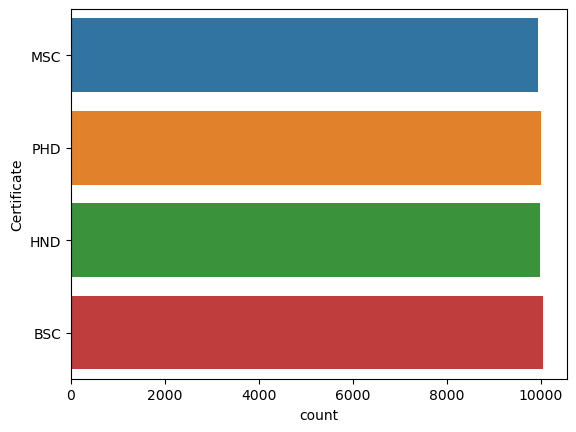

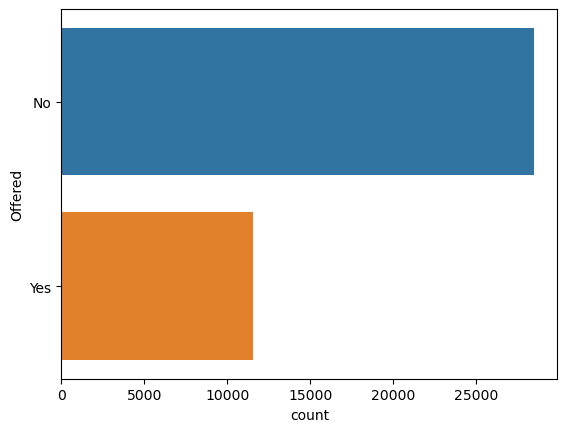

In [11]:
for i in cat:
    sns.countplot(data=df, y= i)
    plt.show()

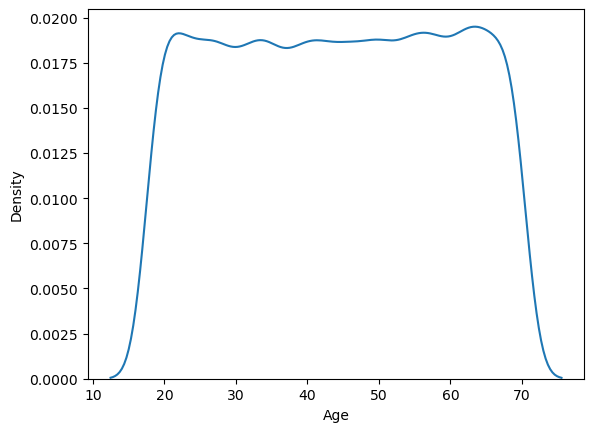

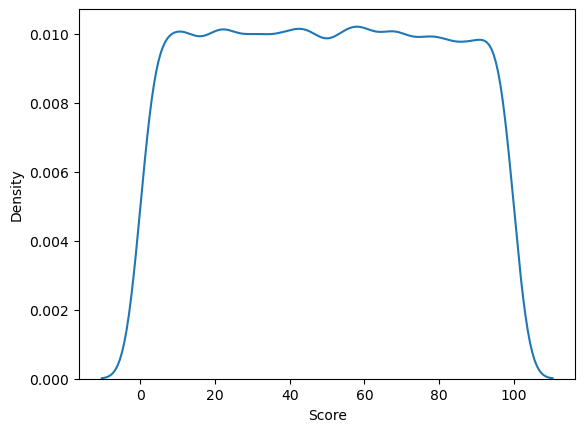

In [12]:
for i in num:
    sns.kdeplot(data=df, x= i)
    plt.show()

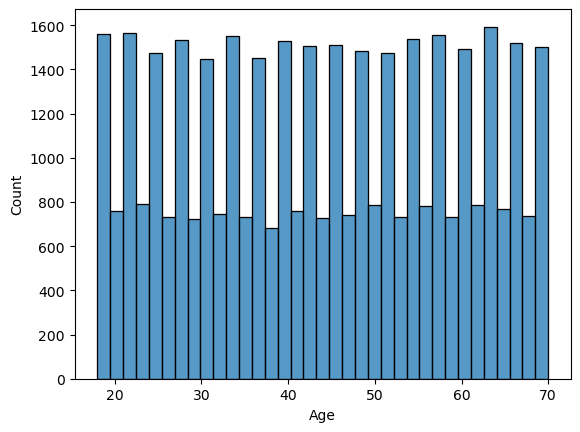

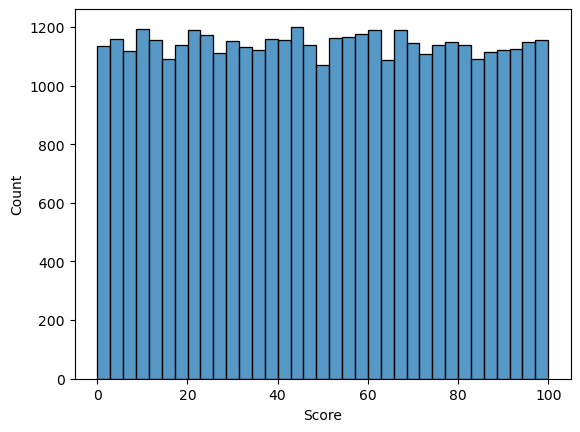

In [13]:
for i in num:
    sns.histplot(data=df, x= i)
    plt.show()

In [14]:
df["Offered"]=df["Offered"].replace({'Yes':1,'No':0})

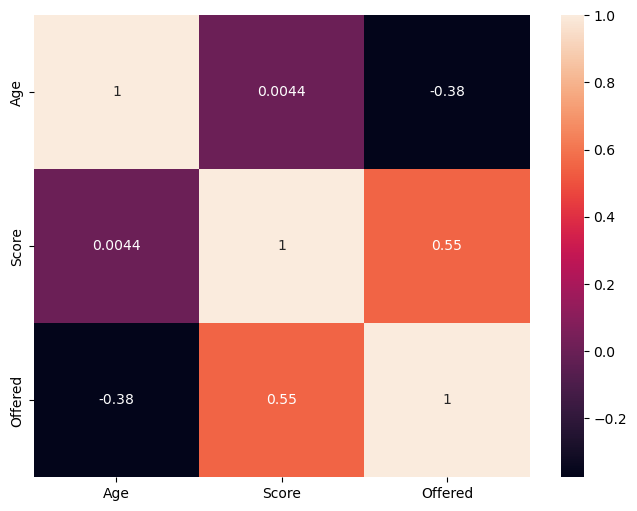

In [15]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [16]:
 df["Certificate"] =df["Certificate"].replace({'HND':1,'BSC':2,'MSC':3,'PHD':4})

In [17]:
X = df.drop("Offered",axis=1)
y = df['Offered']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .30, stratify=y)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28000, 3)
(12000, 3)
(28000,)
(12000,)


In [20]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [21]:
print(accuracy_score(y_test, rf_pred))

1.0


In [22]:
print(confusion_matrix(y_test,rf_pred))

[[8540    0]
 [   0 3460]]


In [23]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8540
           1       1.00      1.00      1.00      3460

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



In [24]:
sv = SVC(probability=True)
sv.fit(X_train,y_train)
sv_pred = sv.predict(X_test)

In [25]:
print(accuracy_score(y_test, sv_pred))

0.9818333333333333


In [26]:
print(confusion_matrix(y_test,sv_pred))

[[8420  120]
 [  98 3362]]


In [27]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8540
           1       0.97      0.97      0.97      3460

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [28]:
filename="rf_model"
pkl.dump(rf,open(filename,'wb'))

In [29]:
filename="sv_model"
pkl.dump(sv,open(filename,'wb'))